# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #bump back up to 1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) #bump back up to 1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

619


#### Perform API Calls

In [3]:
# Prepare to capture weather data fields in lists
cloud =[]
country =[]
date =[]        
humidity=[]      
lat=[]   
lng =[] 
temp_max=[]
wind=[]
cities_found=[]

# Run loop to get data (parameters guide: https://openweathermap.org/current)
settings = {"units": "imperial", "appid": api_key}
print("Beginning Data Retrieval")    
print("-----------------------------")
for city in cities:
    # Handle exceptions for missing cities
    try:
        response = owm.get_current(city, **settings)
        print(f"Processing Record {cities.index(city)+1} of Set 1  | {city}")
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        date.append(response["dt"])
        wind.append(response["wind"]["speed"])
        temp_max.append(response["main"]["temp_max"])
        cities_found.append(response["name"])

    except: 
        print(f"{city} not found. Skipping...")

# Convert date to format for chart
weather_date = datetime.datetime.utcfromtimestamp(date[0])

Beginning Data Retrieval
-----------------------------
vaitupu not found. Skipping...
Processing Record 2 of Set 1  | port alfred
Processing Record 3 of Set 1  | puerto ayora
Processing Record 4 of Set 1  | alizai
Processing Record 5 of Set 1  | isangel
Processing Record 6 of Set 1  | ushuaia
Processing Record 7 of Set 1  | sitka
Processing Record 8 of Set 1  | victoria
Processing Record 9 of Set 1  | pasni
acuna not found. Skipping...
Processing Record 11 of Set 1  | itaituba
Processing Record 12 of Set 1  | east london
Processing Record 13 of Set 1  | bay roberts
Processing Record 14 of Set 1  | qaanaaq
attawapiskat not found. Skipping...
Processing Record 16 of Set 1  | hithadhoo
taolanaro not found. Skipping...
Processing Record 18 of Set 1  | kapaa
Processing Record 19 of Set 1  | goderich
Processing Record 20 of Set 1  | tasiilaq
Processing Record 21 of Set 1  | ostrovnoy
Processing Record 22 of Set 1  | canoa
Processing Record 23 of Set 1  | carlos antonio lopez
marcona not foun

In [4]:
# Print the city found count to confirm sufficient data
print(len(cities_found))

557


#### Convert Raw Data to DataFrame

In [5]:
# Create a dictionary out of lists  
weather_dict = {
    "City": cities_found,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat": lat,
    "Lng":lng,
    "Max Temp": temp_max,
    "Wind Speed": wind
}

# Create dataframe
weather_data = pd.DataFrame(weather_dict)

# Export as CSV
weather_data.to_csv("weather data.csv", encoding='utf-8', index=False)

# Preview dataframe
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Alfred,46,ZA,1572292754,70,-33.59,26.89,59.0,13.00
1,Puerto Ayora,75,EC,1572292754,61,-0.74,-90.35,78.8,8.05
2,Alizai,20,PK,1572292754,64,33.94,71.55,68.0,2.68
3,Isangel,20,VU,1572292754,93,-19.55,169.27,66.2,16.49
4,Ushuaia,20,AR,1572292724,69,-54.81,-68.31,44.6,20.80


#### Latitude vs. Temperature Plot

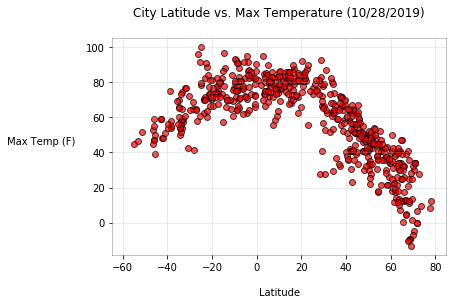

In [6]:
# Create plot
fig, ax = plt.subplots()
x_axis= weather_data['Lat']
y_axis= weather_data['Max Temp']
plt.scatter(x_axis,y_axis, marker ="o", facecolors ="red",edgecolors='black',alpha=.7)
plt.xlim(-65,85)
plt.ylim(min(y_axis)-5,max(y_axis)+5)

# Add chart elements
plt.grid(alpha=.3)
plt.title(f"City Latitude vs. Max Temperature ({weather_date.strftime('%m/%d/%Y')})\n",weight='medium')
plt.xlabel("\nLatitude")
plt.ylabel("Max Temp (F)  ",ha='right',rotation =0)

# Additional viz adjustments
ax.spines['top'].set_alpha(alpha=.3)
ax.spines['right'].set_alpha(alpha=.3)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

plt.savefig("Lat_vs_Max_temp.png",bbox_inches = "tight")

#### Latitude vs. Humidity Plot

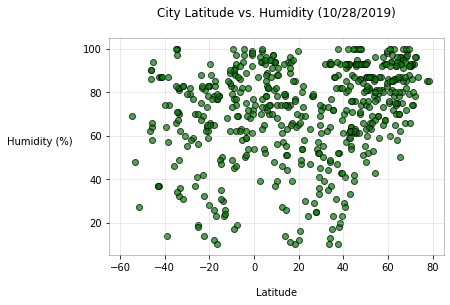

In [7]:
# Create plot
fig, ax = plt.subplots()
x_axis= weather_data['Lat']
y_axis= weather_data['Humidity']
plt.scatter(x_axis,y_axis, marker ="o", facecolors ="green",edgecolors='black',alpha=.7)
plt.xlim(-65,85)
plt.ylim(min(y_axis)-5,max(y_axis)+5)

# Add chart elements
plt.grid(alpha=.3)
plt.title(f"City Latitude vs. Humidity ({weather_date.strftime('%m/%d/%Y')})\n",weight='medium')
plt.xlabel("\nLatitude")
plt.ylabel("Humidity (%)  ",ha='right',rotation =0)

# Additional viz adjustments
ax.spines['top'].set_alpha(alpha=.3)
ax.spines['right'].set_alpha(alpha=.3)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

plt.savefig("Lat_vs_Humidity.png",bbox_inches = "tight")

#### Latitude vs. Cloudiness Plot

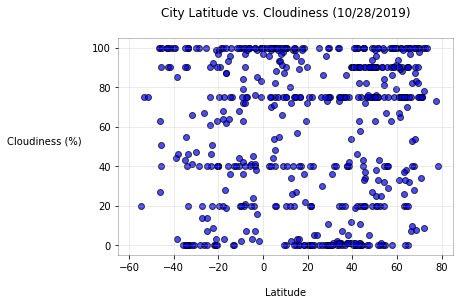

In [8]:
# Create plot
fig, ax = plt.subplots()
x_axis= weather_data['Lat']
y_axis= weather_data['Cloudiness']
plt.scatter(x_axis,y_axis, marker ="o", facecolors ="blue",edgecolors='black',alpha=.7)
plt.xlim(-65,85)
plt.ylim(0-5,100+5)

# Add chart elements
plt.grid(alpha=.3)
plt.title(f"City Latitude vs. Cloudiness ({weather_date.strftime('%m/%d/%Y')})\n",weight='medium')
plt.xlabel("\nLatitude")
plt.ylabel("Cloudiness (%)  ",ha='right',rotation =0)

# Additional viz adjustments
ax.spines['top'].set_alpha(alpha=.3)
ax.spines['right'].set_alpha(alpha=.3)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

plt.savefig("Lat_vs_Cloudiness.png",bbox_inches = "tight")

#### Latitude vs. Wind Speed Plot

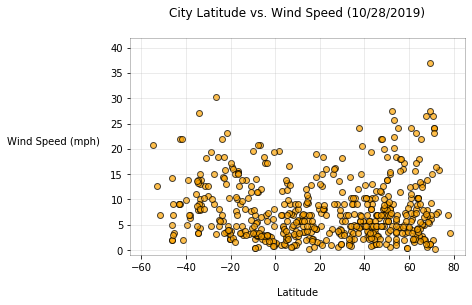

In [9]:
# Create plot
fig, ax = plt.subplots()
x_axis= weather_data['Lat']
y_axis= weather_data['Wind Speed']
plt.scatter(x_axis,y_axis, marker ="o", facecolors ="orange",edgecolors='black',alpha=.7)
plt.xlim(-65,85)
plt.ylim(0-1,max(y_axis)+5)

# Add chart elements
plt.grid(alpha=.3)
plt.title(f"City Latitude vs. Wind Speed ({weather_date.strftime('%m/%d/%Y')})\n",weight='medium')
plt.xlabel("\nLatitude")
plt.ylabel("Wind Speed (mph)  ",ha='right',rotation =0)

# Additional viz adjustments
ax.spines['top'].set_alpha(alpha=.3)
ax.spines['right'].set_alpha(alpha=.3)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

plt.savefig("Lat_vs_Wind.png",bbox_inches = "tight")

In [10]:
# See document "WeatherPy_Assessment_S_Clark" for analysis of data. 